1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

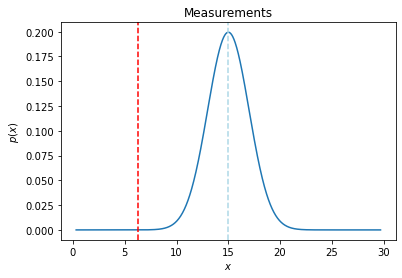

In [74]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize
from scipy.stats import norm
from math import sqrt, pi, erf
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson
import matplotlib.mlab as mlab

x0 = 6.3
mu =  15.
sigma_mu = 2.

w = mu - x0
x = np.linspace(mu - w - 6, w + mu + 6, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma_mu)
plt.plot(x, y)
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()


Z = 3


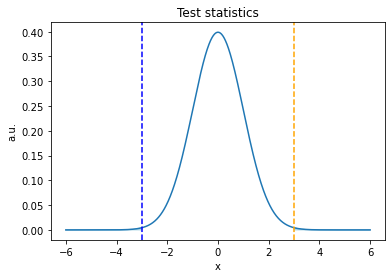

In [17]:
Z = 3
print("Z =", Z)

# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

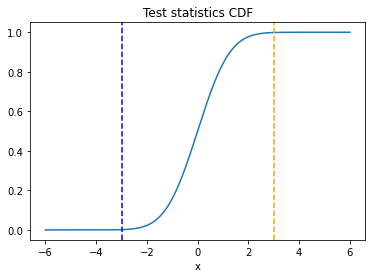

p-value = 0.0026997960632601965


In [18]:
cs = stats.norm.cdf(xs)
plt.plot(xs, cs)
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.title("Test statistics CDF")
plt.xlabel("x")
plt.show()

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

the probability that 15 or more hurricances are observed in a single year is then approx 0.2%

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = 0.7573995876275257


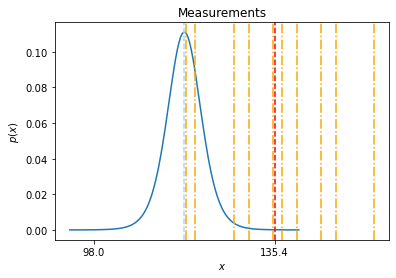

In [27]:
# input data

pre = np.array([120., 132., 120., 110., 115., 128., 120., 112., 110., 100.])
post = np.array([140., 156., 145., 130., 117., 148., 137., 119., 127., 135.])

# calculate the variance and its sqrt()
sigma = np.sqrt((np.var(pre, ddof=1) + np.var(post, ddof=1))/2)

# set the input data
sample_mean = np.mean(post) # mean of the sample (which is different from mu)
mu = np.mean(pre) # the expected value for the mean
n = len(post) # the size of the data sample
w = mu - sample_mean

# calculate the test statistics
T = (sample_mean - mu) / (sigma / np.sqrt(2/n))
print("T =", T)

# plot the measurents
x = np.linspace(mu - w - -5, w + mu + -5, 150)
y = stats.t.pdf(x, loc=mu, scale=sigma / np.sqrt(len(post)), df=len(post) - 1)
plt.plot(x, y)
plt.axvline(sample_mean, linestyle='--', color='red')
for l in post:
    plt.axvline(l, linestyle='-.', color='orange')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.xticks([mu - w, mu + w], [mu - w, mu + w])
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Text(0, 0.5, 'temps in celsius')

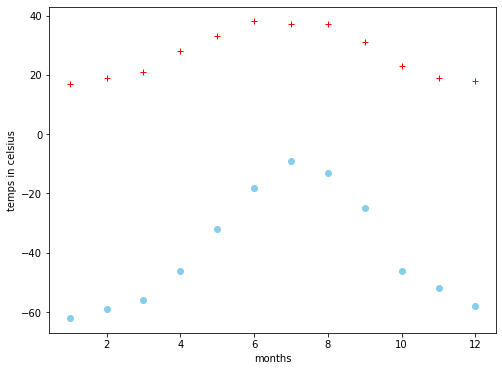

In [70]:
# set the input data(temps)
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#plotting the temps
months = np.arange(12)+1
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8, 6))
plt.plot(months, max_temp, '+', color='red')
plt.plot(months, min_temp, 'o', color='skyblue')

plt.xlabel('months')
plt.ylabel('temps in celsius')

In [78]:
def max_temps (x, A, mean, sigma,shift):
    return A * stats.norm.pdf(x, loc = mean, scale = sigma) + shift



4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.